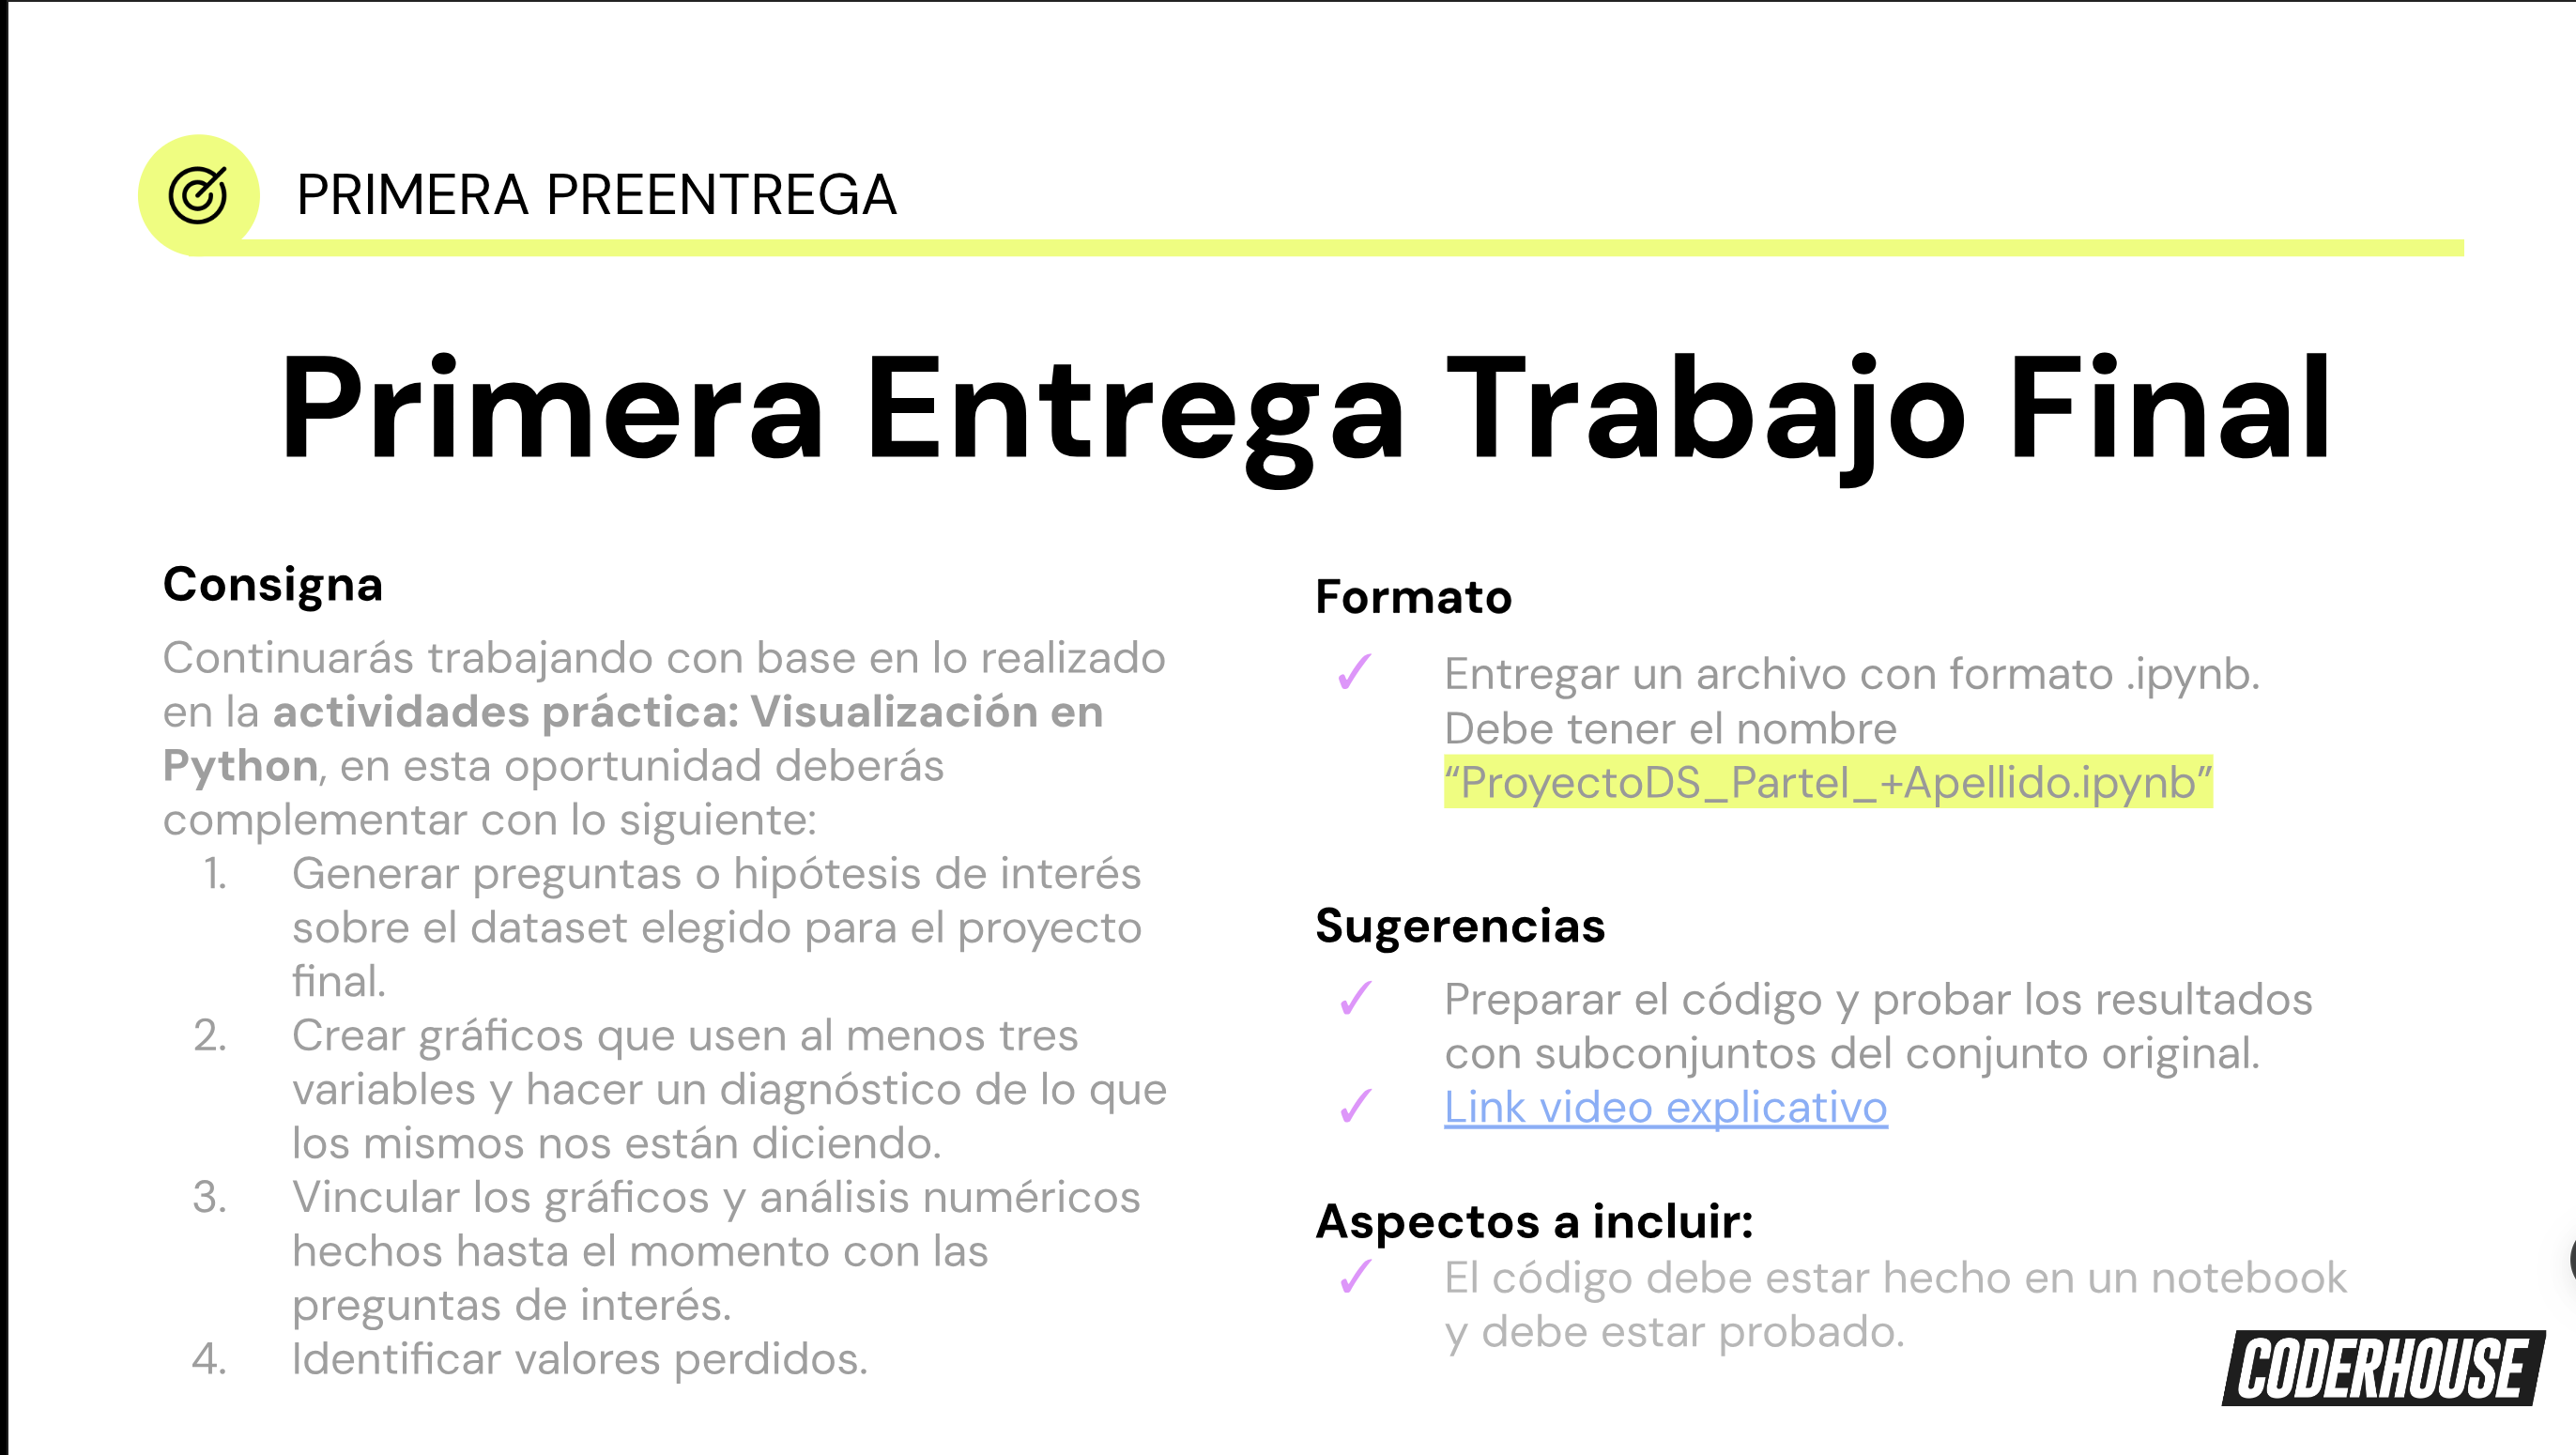

In [182]:
from IPython.display import Image
Image('primera entrega.png', width=1200, height=600)


# **Encuesta de Satisfacción de Pasajeros Aéreos**

## *Abstract*

En el mundo empresarial, comprender y satisfacer las necesidades de los clientes es fundamental para el crecimiento y éxito de una compañía. Para profundizar en la relación entre los clientes y una aerolínea, es crucial realizar encuestas que revelen información relevante sobre sus preferencias y opiniones.

En los últimos años, se ha prestado una atención especial a la perspectiva de género, lo que permite una comprensión más completa de la vida de hombres y mujeres, así como de las relaciones entre ambos. Este enfoque desafía los estereotipos y fomenta la igualdad entre géneros en todos los aspectos de la vida.

Este trabajo se centra en una encuesta realizada a pasajeros de aerolíneas para evaluar su nivel de satisfacción con los servicios prestados. El conjunto de datos, obtenido de Kaggle, contiene más de 100,000 respuestas que proporcionan información valiosa sobre la experiencia de los pasajeros tanto dentro como fuera del avión.

## *Objetivo*

El objetivo principal de este estudio es identificar y abordar los problemas que puedan afectar la satisfacción de los pasajeros, con el fin de mejorar continuamente nuestros servicios.

## *Contexto Comercial*

El mercado aeronáutico de Estados Unidos es altamente competitivo y genera miles de millones de dólares anualmente. Para destacar en este mercado, es crucial ofrecer servicios innovadores y de alta calidad que satisfagan las necesidades de los usuarios.

Hemos recopilado encuestas realizadas a pasajeros para comprender mejor sus opiniones y percepciones sobre nuestros servicios.

## *Desafío Comercial*

Desde una perspectiva de género, buscamos entender la experiencia general de nuestros pasajeros mediante las siguientes preguntas:

1. ¿Cuál es el nivel de satisfacción de nuestros clientes con respecto a nuestros servicios?
   
2. ¿Cuál es el propósito de viaje de nuestros pasajeros?

3. ¿Cuál es la distribución de edades entre nuestros pasajeros? ¿Qué género tiene mayor representación?

4. ¿Hay preferencias de selección de asientos según el propósito del viaje?


# Imports y lecturas iniciales

In [183]:
# Datos
import numpy as np
import pandas as pd

# Visual
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/PabloPerotti/DATASETS/main/aerolinea.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [185]:
df.shape

(103904, 25)

# Descripción de los elementos de la tabla

| Campo  |   Descripción  |
|---|---|
| gender   |   Género del pasajero (Male or Female) |
| Customer type   |   El tipo de cliente al que se le hace la encuesta (Se refiere a si es o no pasajero frecuente)  |
| Age   |   Edad del pasajero  |
| Type of travel  |   Razon de la realizacion del viaje (negocios o vacaciones)  |
| Class   |   Tipo de clase de viaje eligida (el tipo de asiento ya se bussines, Economica o Eco plus) |
| Flight distance   |   La distancia del vuelo que se realiza  |
| Inflight wifi service   |   Nivel de satisfaccion del servicio de wifi abordo (de ser 0 significa que no aplica o que el vuelo no poseia este servicio)  |
| Departure/Arrival time convenient  |   Nivel de satisfaccion del horario de salida/llegada  |
| Ease of Online booking   |    Nivel de satisfaccion de la compra online |
| Gate location   |    Nivel de satisfaccion de la ubicacion de puerta de embarque  |
| Food and drink   |    Nivel de satisfaccion de la comida y la bebida ofrecida  |
| Online boarding  |    Nivel de satisfaccion del checkin online  |
| Seat comfort   |    Nivel de satisfaccion de la comodidad del asiento elegido |
| Inflight entertainment   |    Nivel de satisfaccion del entretenimiento abordo  |
| On-board service   |    Nivel de satisfaccion del servicio abordo  |
| Leg room service  |   Nivel de satisfaccion del espacio para las piernas en el asiento  |
| Baggage handling  |   Nivel de satisfaccion del manejo de valijas  |
| Checkin service  |   Nivel de satisfaccion del servicio de checkin  |
| inflight_service  |   Nivel de satisfaccion del servicio en vuelo  |
| Cleanliness  |   Nivel de satisfaccion de la limpieza  |
| Departure delay in minutes  |   minutos de retraso de salida  |
| Arrival delay in minutes  |   minutos de retraso de llegada  |
| satisfaction  |   Nivel de satisfaccion general (satisfecho, neutral o insatisfecho)  |

# **Limpieza de los datos**

Para un mejor entendimiento de la información contenida dentro de ciertos campos lo que se hará es cambiar los nombres de inglés al castellano. Tambien dentro de éste apartado se cambiaran los elementos que vienen como nulos a 0 dentro del campo retraso_llegada.

In [186]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Puedes notar lo siguiente:

- La columna correspondiente a la columna Arrival Delay in Minutes tiene 310 valores faltantes.
- Las dos primeras columnas son inútiles y no afectarán a la clasificación, así que elimino las columnas.
- Muchas columnas contienen valores categóricos pero son del tipo 'object' o 'int64'. Vamos a reemplazar este tipo con uno especial diseñado para almacenar valores categóricos."

In [188]:
df = df.drop(['Unnamed: 0', "id"], axis=1)


In [189]:
category_indexes = [0,1,3,4] + list(range(6, 20))
df.iloc[:, category_indexes] = df.iloc[:, category_indexes].astype('category')

/var/folders/pf/0b7lbxx57ld639sclb7p23y00000gn/T/ipykernel_31365/1384492360.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, category_indexes] = df.iloc[:, category_indexes].astype('category')


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [191]:
df.describe().round(2)

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,14.82,15.18
std,15.11,997.15,38.23,38.70
min,7.00,31.00,0.00,0.00
25%,27.00,414.00,0.00,0.00
50%,40.00,843.00,0.00,0.00
75%,51.00,1743.00,12.00,13.00
max,85.00,4983.00,1592.00,1584.00


In [192]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [193]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# **Insights**

## Analisis de la distribución según el género del pasajero

Se busca analizar la distribución general de pasajeros según el género, así como evaluar la preferencia por los tipos de asiento. Para ello, primero agruparemos a los pasajeros según la clase de asiento elegida y luego según el género. Esto nos permitirá comprender tanto la composición de género en cada clase de asiento como las preferencias de género dentro de cada categoría de asiento.

In [194]:
# Distribución general por género
distribucion_genero_general = df['Gender'].value_counts().reset_index()
distribucion_genero_general.columns = ['Gender', 'CANTIDAD']

# Distribución por clase de asiento y género
distribucion_genero_asiento = df.groupby(['Class', 'Gender']).size().reset_index(name='CANTIDAD')

In [195]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Gráfico correspondiente a la distribución a nivel general

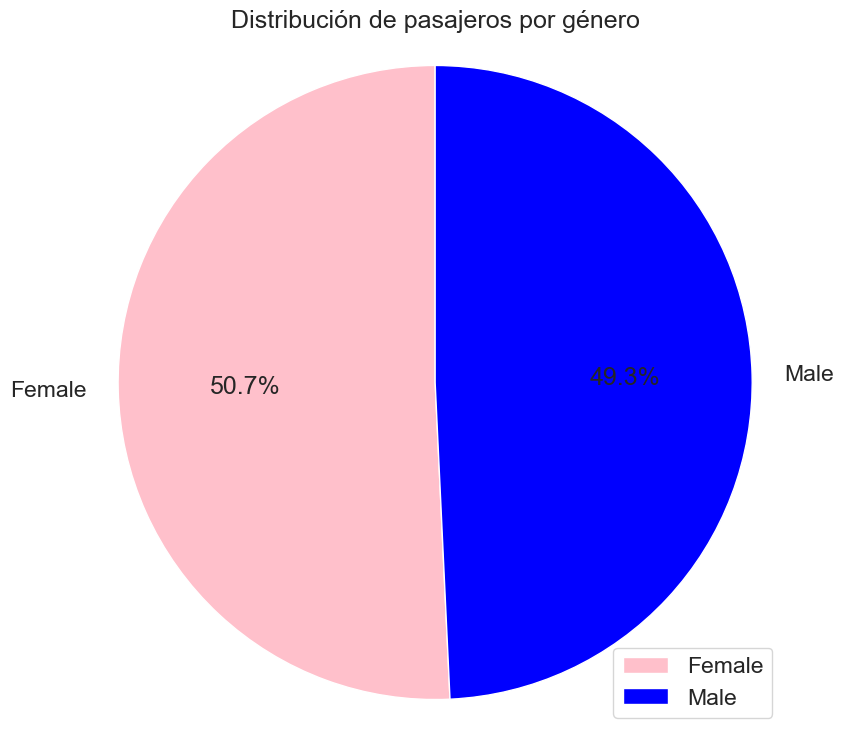

In [196]:
# Defino el esquema de colores personalizado
colores = {'Male': 'blue', 'Female': 'pink'}

#Gráfico de pastel
figura_genero_general, ax = plt.subplots(figsize = (9, 9))
ax.pie(distribucion_genero_general['CANTIDAD'], labels=distribucion_genero_general['Gender'], autopct='%1.1f%%', startangle=90, colors=[colores[g] for g in distribucion_genero_general['Gender']])
ax.set_title('Distribución de pasajeros por género')
plt.axis('equal')  # Aseguro que el gráfico sea un círculo
plt.legend(loc='lower right')  # Mostrar la leyenda 
plt.show()



### Gráfico correspondiente a la distribución a nivel de clase de asientos

In [197]:
print(distribucion_genero_asiento.columns)


Index(['Class', 'Gender', 'CANTIDAD'], dtype='object')


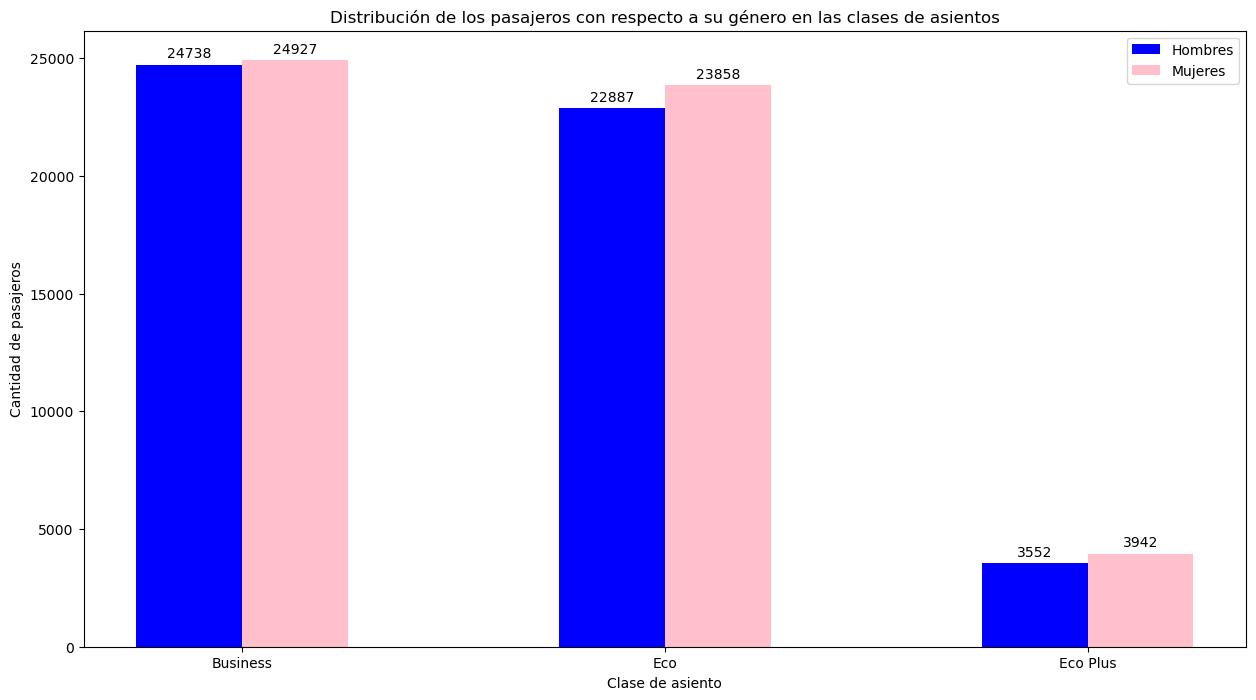

In [208]:
color_mapping = {'Male': 'blue', 'Female': 'pink'}

# Agrupo los datos por clase de asiento y género
grupo = distribucion_genero_asiento.groupby(['Class', 'Gender']).sum().unstack()

plt.style.use('default')

# Grafico de barras
plt.figure(figsize=(15, 8))

# Convierto el índice en una lista
indice_list = list(range(len(grupo)))

# Dibujo las barras para cada género
barra_hombres = plt.bar(indice_list, grupo['CANTIDAD']['Male'], width=0.25, label='Hombres', color=color_mapping['Male'])
barra_mujeres = plt.bar([x + 0.25 for x in indice_list], grupo['CANTIDAD']['Female'], width=0.25, label='Mujeres', color=color_mapping['Female'])

# Agrego titulo y labels
plt.xlabel('Clase de asiento')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de los pasajeros con respecto a su género en las clases de asientos')
plt.xticks([x + 0.25 / 2 for x in indice_list], grupo.index)
plt.legend()

# Agrego los totales a cada barra
for rect in barra_hombres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

for rect in barra_mujeres.patches:
    plt.annotate(f'{rect.get_height():.0f}', xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()


### Análisis de los gráficos de distribución general en razon del género

De los gráficos surge que hubieron más pasajeros mujeres que hombres, tendencia que también se ve reflejada en la eleccion de los tipos de clase de asientos.


## Análisis de los tipos de cliente según el género


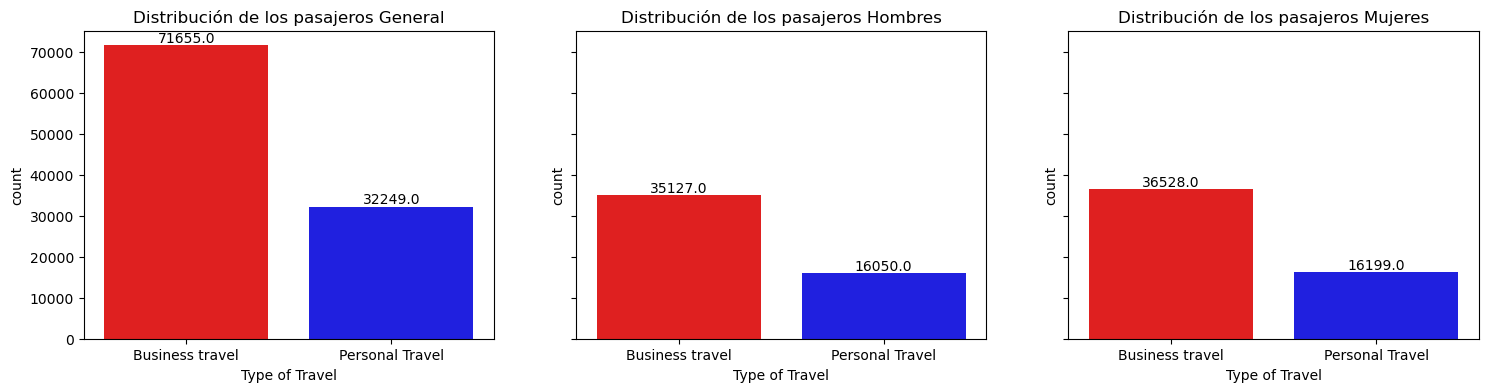

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ["red", "blue"]
# Defino el orden de los tipos de viaje
order = ['Business travel', 'Personal Travel']

for i, (gen_pas, genero) in enumerate(zip([['Male','Female'], ['Male'], ['Female']], ['General', 'Hombres', 'Mujeres'])):
    df_gen_pas = df[df['Gender'].isin(gen_pas)]
    
    sns.countplot(data = df_gen_pas, x = 'Type of Travel', ax = axs[i], order = order, palette = colors)
    axs[i].set_title('Distribución de los pasajeros ' + genero)
    
    for bar in axs[i].patches:
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha = 'center', va = 'bottom')

plt.show()

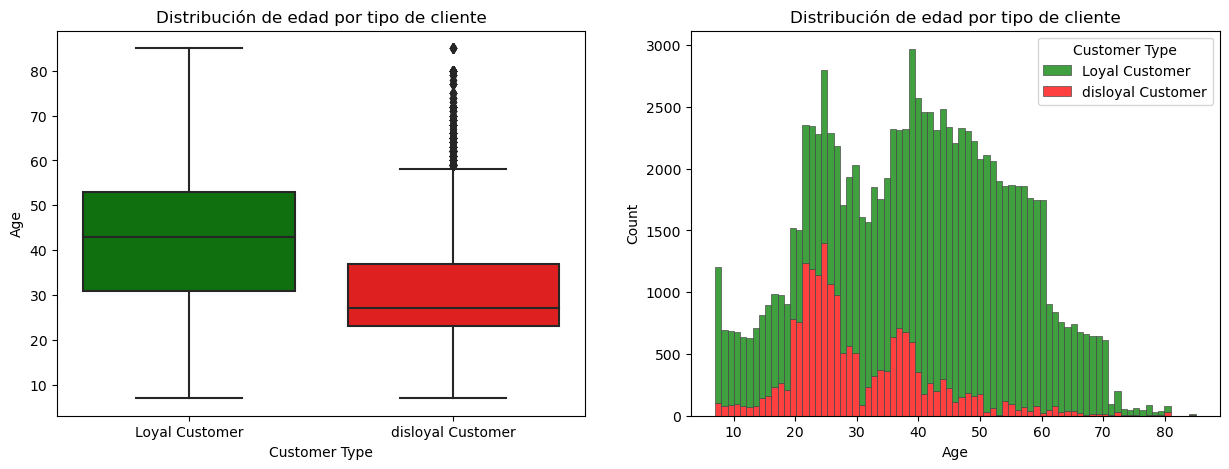

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colors = ('green', 'red')
order = ('Loyal Customer', 'disloyal Customer')

# Gráfico de caja
sns.boxplot(x="Customer Type", y="Age", palette=colors, data=df, ax=axs[0], order=order)
axs[0].set_title("Distribución de edad por tipo de cliente")

# Gráfico de histograma apilado
sns.histplot(df, x="Age", hue="Customer Type", multiple="stack", palette=colors, edgecolor=".3", linewidth=.5, ax=axs[1])
axs[1].set_title("Distribución de edad por tipo de cliente")

plt.show()

### Análisis de los gráficos

En los gráficos se muestra una marcada presencia de los pasajeros leales, que serían aquellos que se encuentran dentro de los programas de fidelidad de las aerolineas.

## Retraso de vuelos
Se necesita saber la distribución de los retrasos y el tiempo de retraso que se tuvo teniendo en cuenta la clase de asiento elegida

In [ ]:
#Criterio por clase de asiento
distribucion_viaje_asiento = df.groupby(['Class', 'Type of Travel']).size().reset_index(name='CANTIDAD')
distribucion_viaje_asiento

,Class,Type of Travel,CANTIDAD
0,Business,Business travel,47508
1,Business,Personal Travel,2157
2,Eco,Business travel,20257
3,Eco,Personal Travel,26488
4,Eco Plus,Business travel,3890
5,Eco Plus,Personal Travel,3604


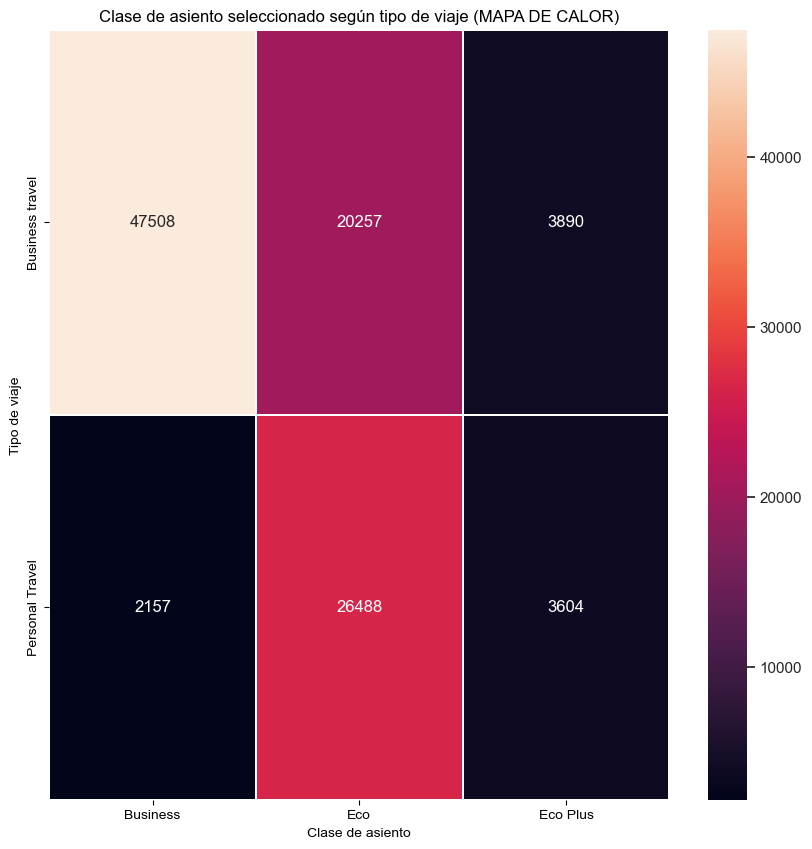

In [ ]:
asientovuelos = distribucion_viaje_asiento.pivot(index='Type of Travel', columns='Class', values='CANTIDAD')
f, ax = plt.subplots(figsize=(10, 10))

sns.set_theme(style="ticks", font_scale=1)
mapacalorcodigo = sns.heatmap(asientovuelos, annot=True, fmt=".0f", linewidths=.2, ax=ax)
mapacalorcodigo.set(xlabel="Clase de asiento", ylabel="Tipo de viaje", title="Clase de asiento seleccionado según tipo de viaje (MAPA DE CALOR)")

plt.show()


### Análisis del gráfico
Se observa una clara preferencia por los asientos de clase Business en los viajes de negocios, mientras que en los viajes de vacaciones se destaca una tendencia hacia la selección de los asientos de clase económica (Eco).

## Se desea conocer la distribución de los pasajeros según su edad y genero

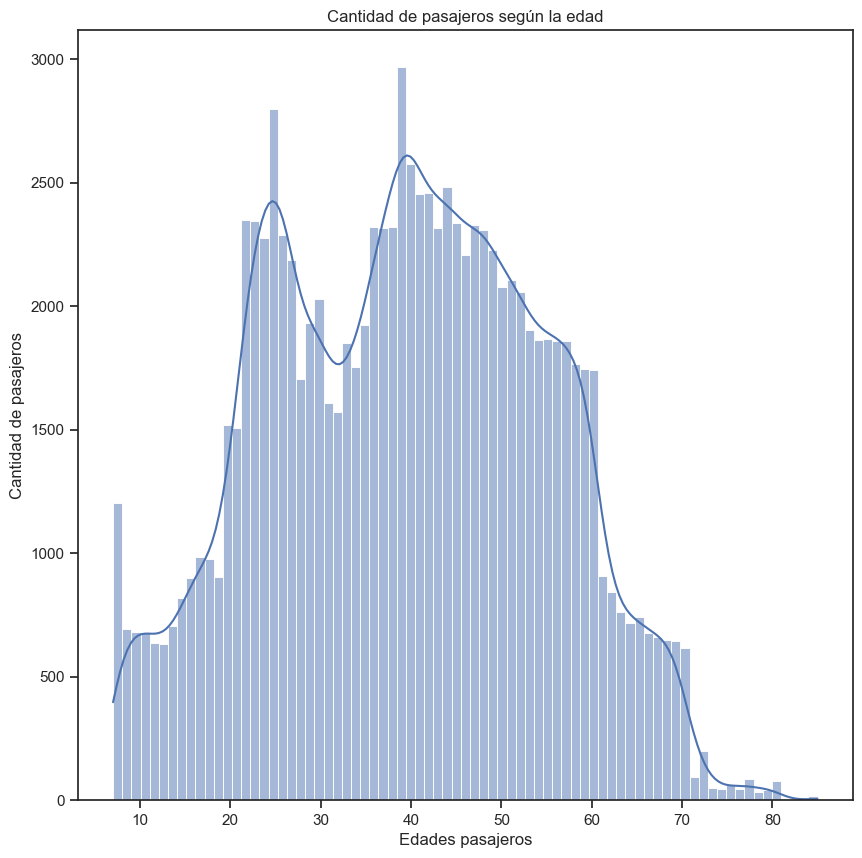

In [ ]:
#Analisis de edad generalizado
f, ax = plt.subplots(figsize=(10, 10))

histogramaedad=sns.histplot(data=df, x="Age",kde=True)
histogramaedad.set(xlabel="Edades pasajeros",ylabel="Cantidad de pasajeros",title="Cantidad de pasajeros según la edad")

plt.show()

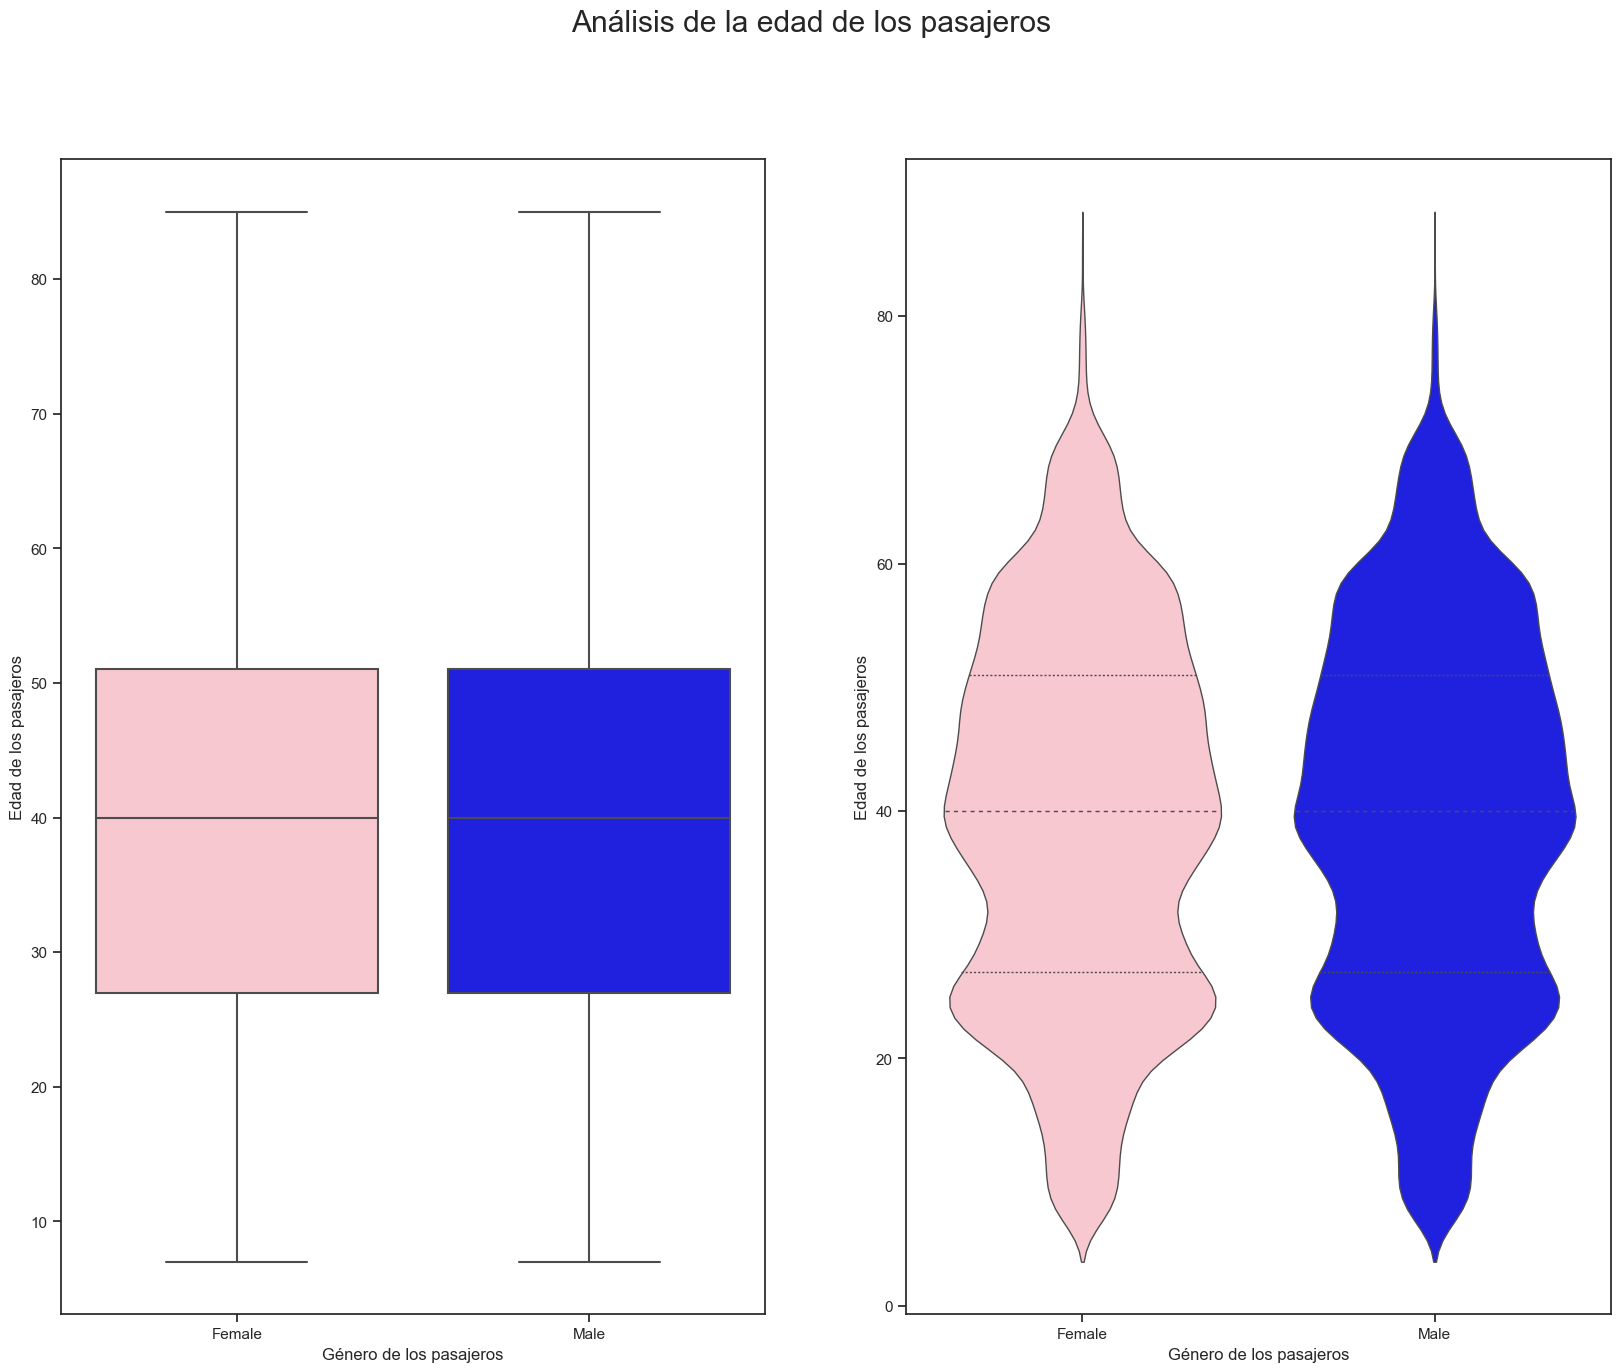

In [ ]:
color_mapping = {'Male': 'blue', 'Female': 'pink'}
fig_edad_pas_gral, axes = plt.subplots(1, 2, figsize = (20,15))

sns.set_theme(style = "ticks", font_scale = 1.5)

#Grafico de caja
sns.boxplot(x = "Gender", y = "Age" , data = df,ax = axes[0], palette=color_mapping)
axes[0].set_ylabel("Edad de los pasajeros")
axes[0].set_xlabel("Género de los pasajeros")

#Grafico de violin
sns.violinplot(x = "Gender", y = "Age",data = df, split = True, inner = "quart", linewidth = 1, ax = axes[1], palette=color_mapping)
axes[1].set_ylabel("Edad de los pasajeros")
axes[1].set_xlabel("Género de los pasajeros")

fig_edad_pas_gral.suptitle("Análisis de la edad de los pasajeros")

plt.show()

### Análisis de los gráficos

**Análisis de Edades de Pasajeros:**

El conjunto de datos presenta un equilibrio notable entre los géneros. Para explorar las edades de los pasajeros, empleamos dos tipos de gráficos: un diagrama de caja (boxplot) a la izquierda y un gráfico de violín a la derecha.

- **Diagrama de Caja (Boxplot):** Para el sexo femenino, la distribución de edades muestra una mediana alrededor de los 40 años, con los cuartiles inferiores y superiores igualados por debajo y por encima de los 50 años, respectivamente. Este equilibrio sugiere una diversidad de edades entre las pasajeras.

- **Gráfico de Violín:** Complementando la información, el gráfico de violín revela que la mayoría de los pasajeros, tanto masculinos como femeninos, se encuentran en un rango de edades entre los 25 y los 60 años. Esta distribución uniforme señala una amplia representación de diferentes grupos etarios en el conjunto de datos.

Finalmente, el histograma general muestra una tendencia similar, sin distinguir entre géneros. Los picos de frecuencia ocurren aproximadamente a los 25 y 38 años, con una presencia mínima de pasajeros mayores de 70 años.

Este análisis resalta la diversidad de edades en la muestra de pasajeros, con una representación significativa en una amplia gama de grupos etarios.

Este análisis proporciona una descripción más clara y estructurada de las tendencias observadas en los gráficos, resaltando los hallazgos más relevantes y proporcionando una interpretación significativa de los resultados.


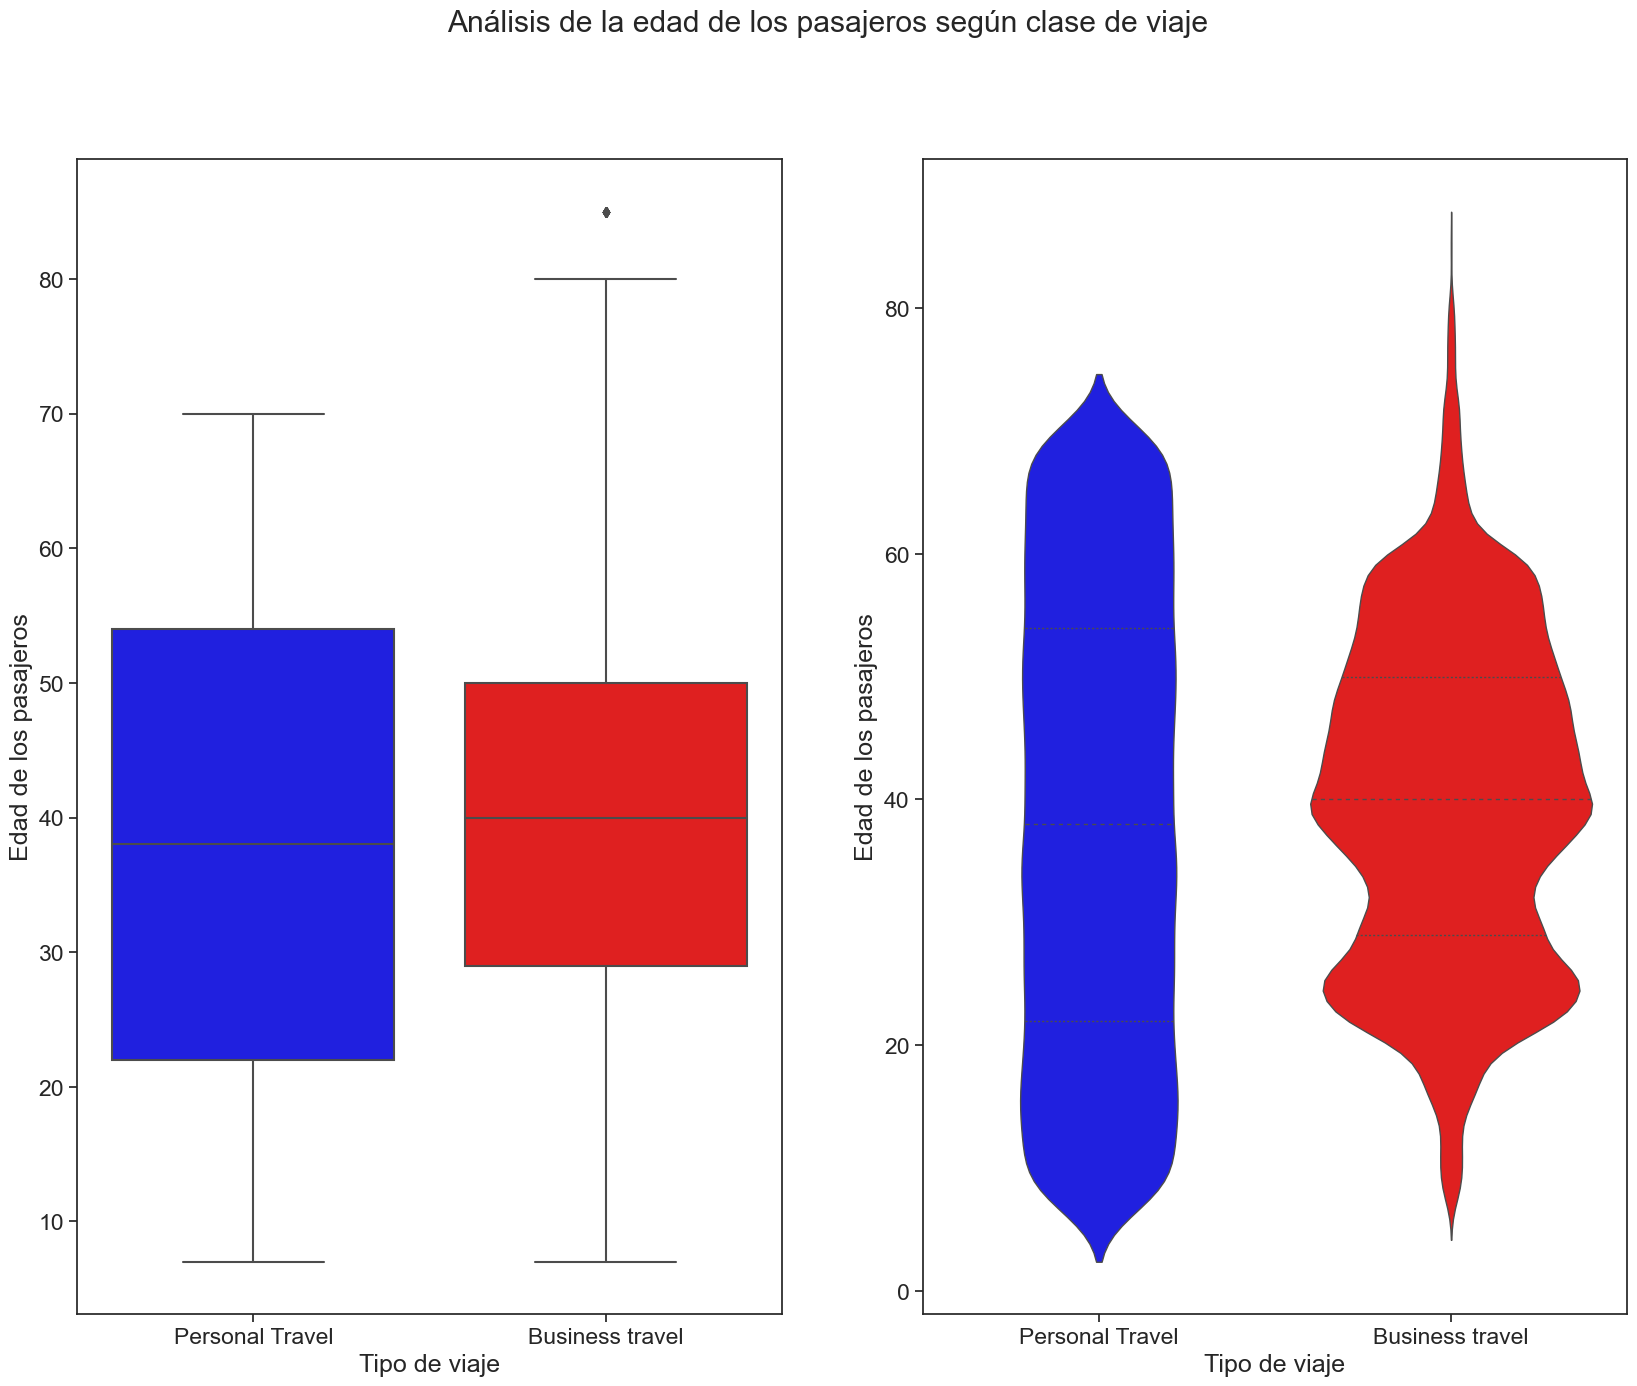

In [ ]:
fig_edad_pas_tipo_viaje, axes = plt.subplots(1, 2, figsize = (20,15))
order = ['Personal Travel', 'Business travel']
colors = ["blue", "red"]
sns.set_theme(style = "ticks", font_scale = 1.5)

#Grafico de caja
sns.boxplot(x = "Type of Travel", y = "Age", data = df, ax = axes[0], palette = colors, order = order)
axes[0].set_ylabel("Edad de los pasajeros")
axes[0].set_xlabel("Tipo de viaje")

#Grafico de violin
sns.violinplot(x = "Type of Travel", y = "Age", data = df, split = True, inner = "quart", linewidth = 1, ax = axes[1], palette = colors, order = order)
axes[1].set_ylabel("Edad de los pasajeros")
axes[1].set_xlabel("Tipo de viaje")

fig_edad_pas_tipo_viaje.suptitle("Análisis de la edad de los pasajeros según clase de viaje")

plt.show()

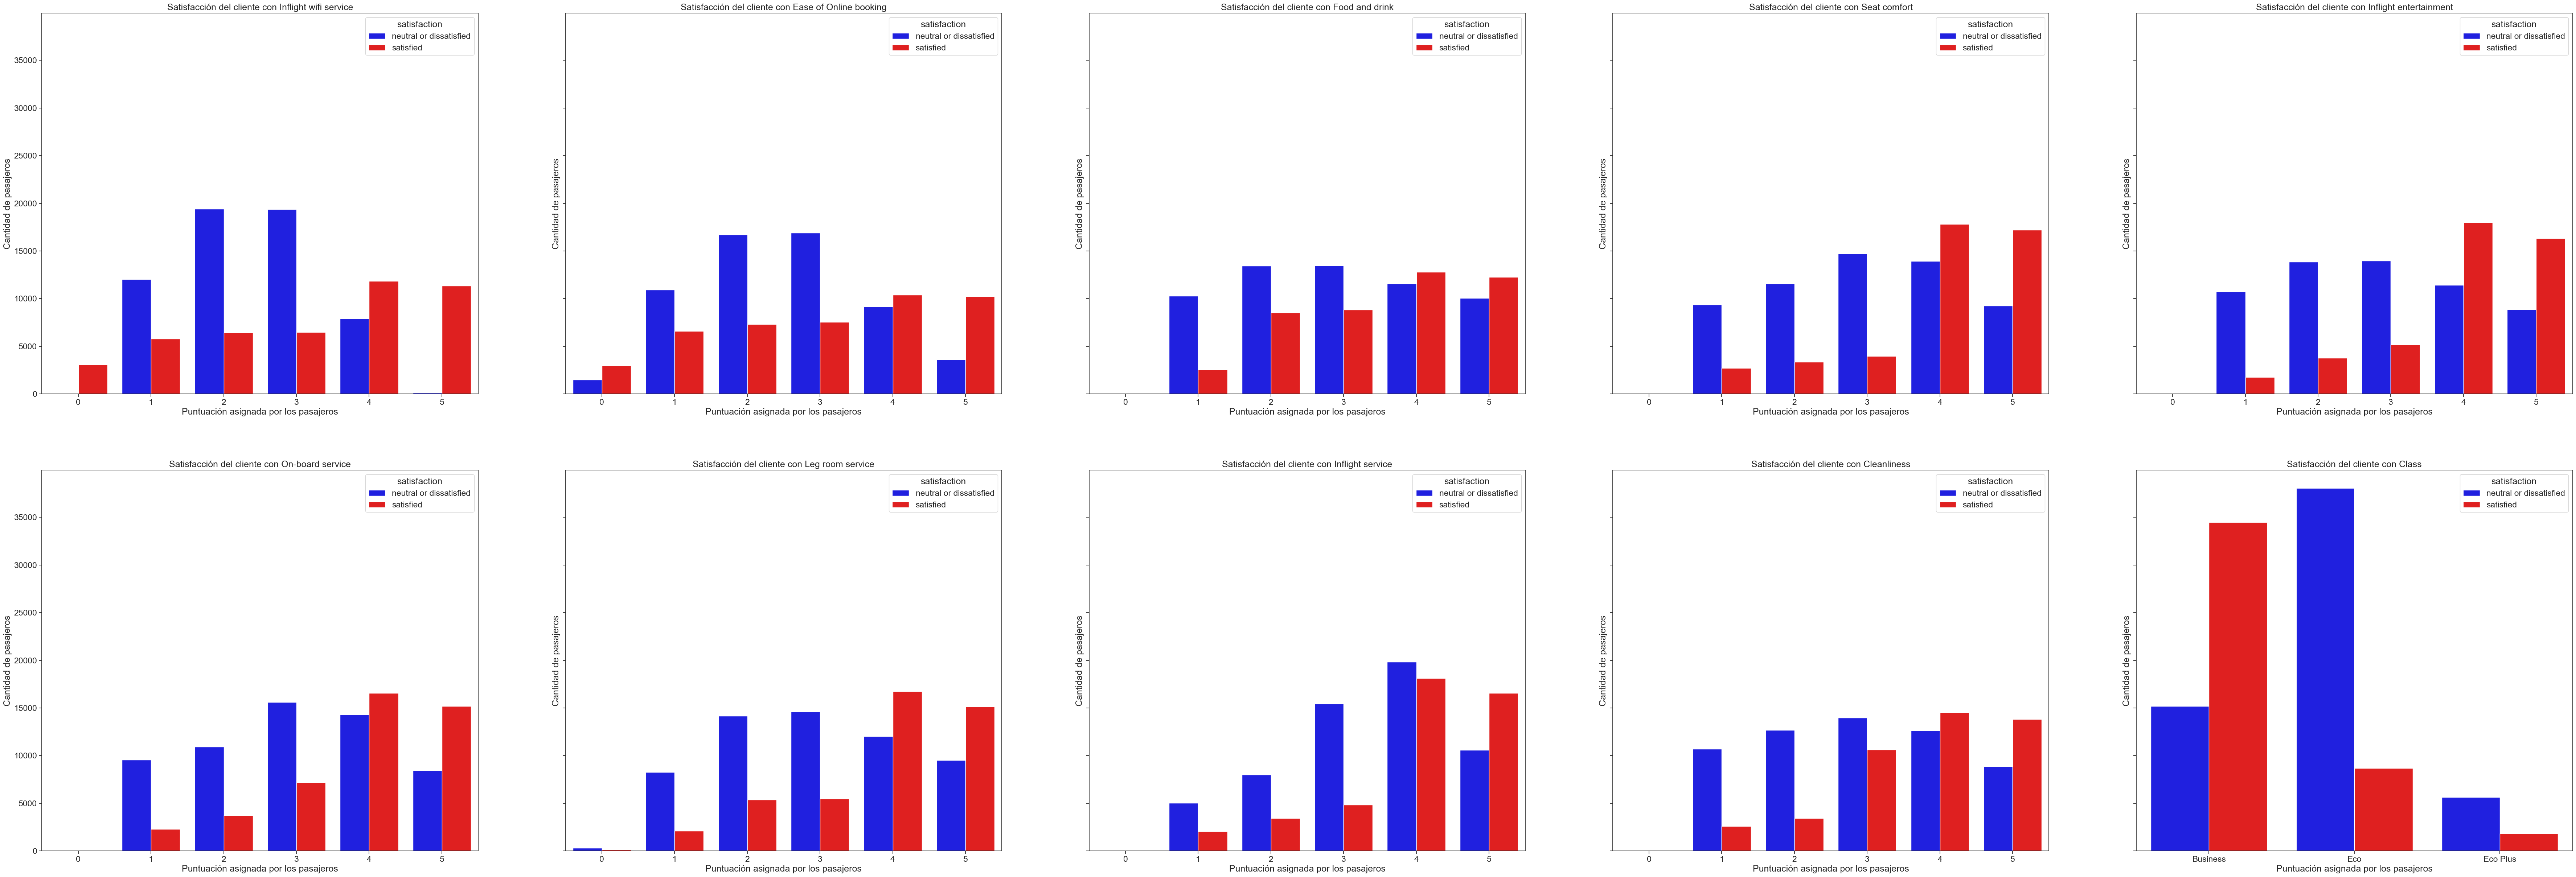

In [ ]:
fig, axs = plt.subplots(2, 5, figsize = (90, 30), sharey = True)
colors = ["blue", "red"]
for variable, ax in zip(['Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','Inflight entertainment','On-board service','Leg room service','Inflight service','Cleanliness','Class'], axs.flat):
    # Gráfico
    sns.countplot(x = df[variable], hue = df['satisfaction'], ax = ax, palette = colors)
    ax.set_title(f'Satisfacción del cliente con {variable.replace(" _ ", " ")}')
    ax.set(xlabel = 'Puntuación asignada por los pasajeros', ylabel = 'Cantidad de pasajeros')


## Ánalisis de los gráficos

Por lo que muestran los gráficos, parece que la tendencia general apunta hacia cierta insatisfacción con los servicios proporcionados. La mayoría de los pasajeros optaron por respuestas neutras o insatisfechas. Sin embargo, también se observa una concentración de pasajeros satisfechos en los puntajes más altos de los diferentes servicios ofrecidos.

## Conclusiones generales de lo analizado
Después de examinar detenidamente el dataset, se observa un equilibrio generalizado en los datos. La proporción de pasajeros masculinos y femeninos es casi idéntica, con una ligera ventaja para las mujeres (aproximadamente un 1,4% más). En cuanto a las preferencias de clase de asiento, la Business Class es la más popular, seguida de la Economy Class, mientras que la Economy Plus es la menos elegida.

Además, se observa que la mayoría de los pasajeros que eligen la clase Business suelen viajar por motivos de negocios, mientras que aquellos que optan por la clase Economy tienden a hacerlo por placer. Sin embargo, la diferencia en la cantidad de pasajeros entre los viajes de negocios y de placer no es significativa.

En relación a la edad de los pasajeros, se encuentra que la mediana se sitúa alrededor de los 40 años tanto para hombres como para mujeres.

Por último, el análisis revela una proporción considerable de pasajeros insatisfechos con los servicios proporcionados por la aerolínea. Los aspectos peor valorados incluyen el servicio de wifi, la facilidad de compra de pasajes y el espacio para las piernas.

## Recomendaciones en base a lo observado
Basándonos en los datos obtenidos del conjunto de datos, se sugiere realizar una actualización integral de los servicios ofrecidos por la compañía aérea. Esto incluiría mejoras significativas en áreas críticas como el servicio de wifi, la plataforma de compra de boletos y el espacio para las piernas en los asientos.

Además, dado que se observa una cantidad considerable de pasajeros que viajan por motivos de negocios, se recomienda dirigir esfuerzos y campañas publicitarias específicamente a este grupo demográfico. Dado que estos pasajeros suelen optar por las clases más caras de la aerolínea, como la Business Class, mejorar los servicios dirigidos a este segmento podría tener un impacto significativo en los ingresos de la empresa.

# **Feature selection**
El objetivo consiste en depurar los datos, eliminando aquellos campos que no aportan información relevante para la predicción. De esta manera, se busca organizar los datos de manera óptima para evitar que el modelo reciba información redundante o poco útil, lo que podría afectar la calidad y confiabilidad de las predicciones.

# Codificación de variables categóricas

Para poder realizar el análisis y construir modelos predictivos, es necesario convertir las variables categóricas en códigos numéricos. Este proceso nos permitirá luego realizar la matriz de correlación y trabajar con los datos de manera más eficiente.

En primer lugar, se procederá a codificar las variables categóricas. Para el género, se asignará el código 0 para "Masculino" y 1 para "Femenino". Este mismo procedimiento se aplicará al tipo de viaje, clase elegida, tipo de cliente y la variable objetivo (satisfacción del pasajero).

In [ ]:
dict_gen = {'Male' : 0, 'Female' : 1}
df['Gender'] = df.Gender.replace(dict_gen)

dict_viaje={'Personal Travel' : 0,'Business travel':1}
df['Type of Travel'] = df['Type of Travel'].replace(dict_viaje)

dict_clase={'Eco':0,'Eco Plus':1,'Business':2}
df['Class'] = df.Class.replace(dict_clase)

dict_tipo={'disloyal Customer':0,'Loyal Customer':1}
df['Customer Type'] = df['Customer Type'].replace(dict_tipo)

dict_satisfaccionv2={'neutral o no satisfecho':0,'satisfecho':1}
df['satisfaction'] = df.satisfaction.replace(dict_satisfaccionv2)

# Visualización de la matriz de correlación

Con el fin de obtener una comprensión clara de las relaciones entre las variables, vamos a crear un mapa de calor (heatmap) que represente visualmente los valores de correlación. Este heatmap nos permitirá evaluar tanto la fuerza como la dirección de las relaciones entre las variables, ayudándonos a identificar patrones y posibles asociaciones en nuestros datos.

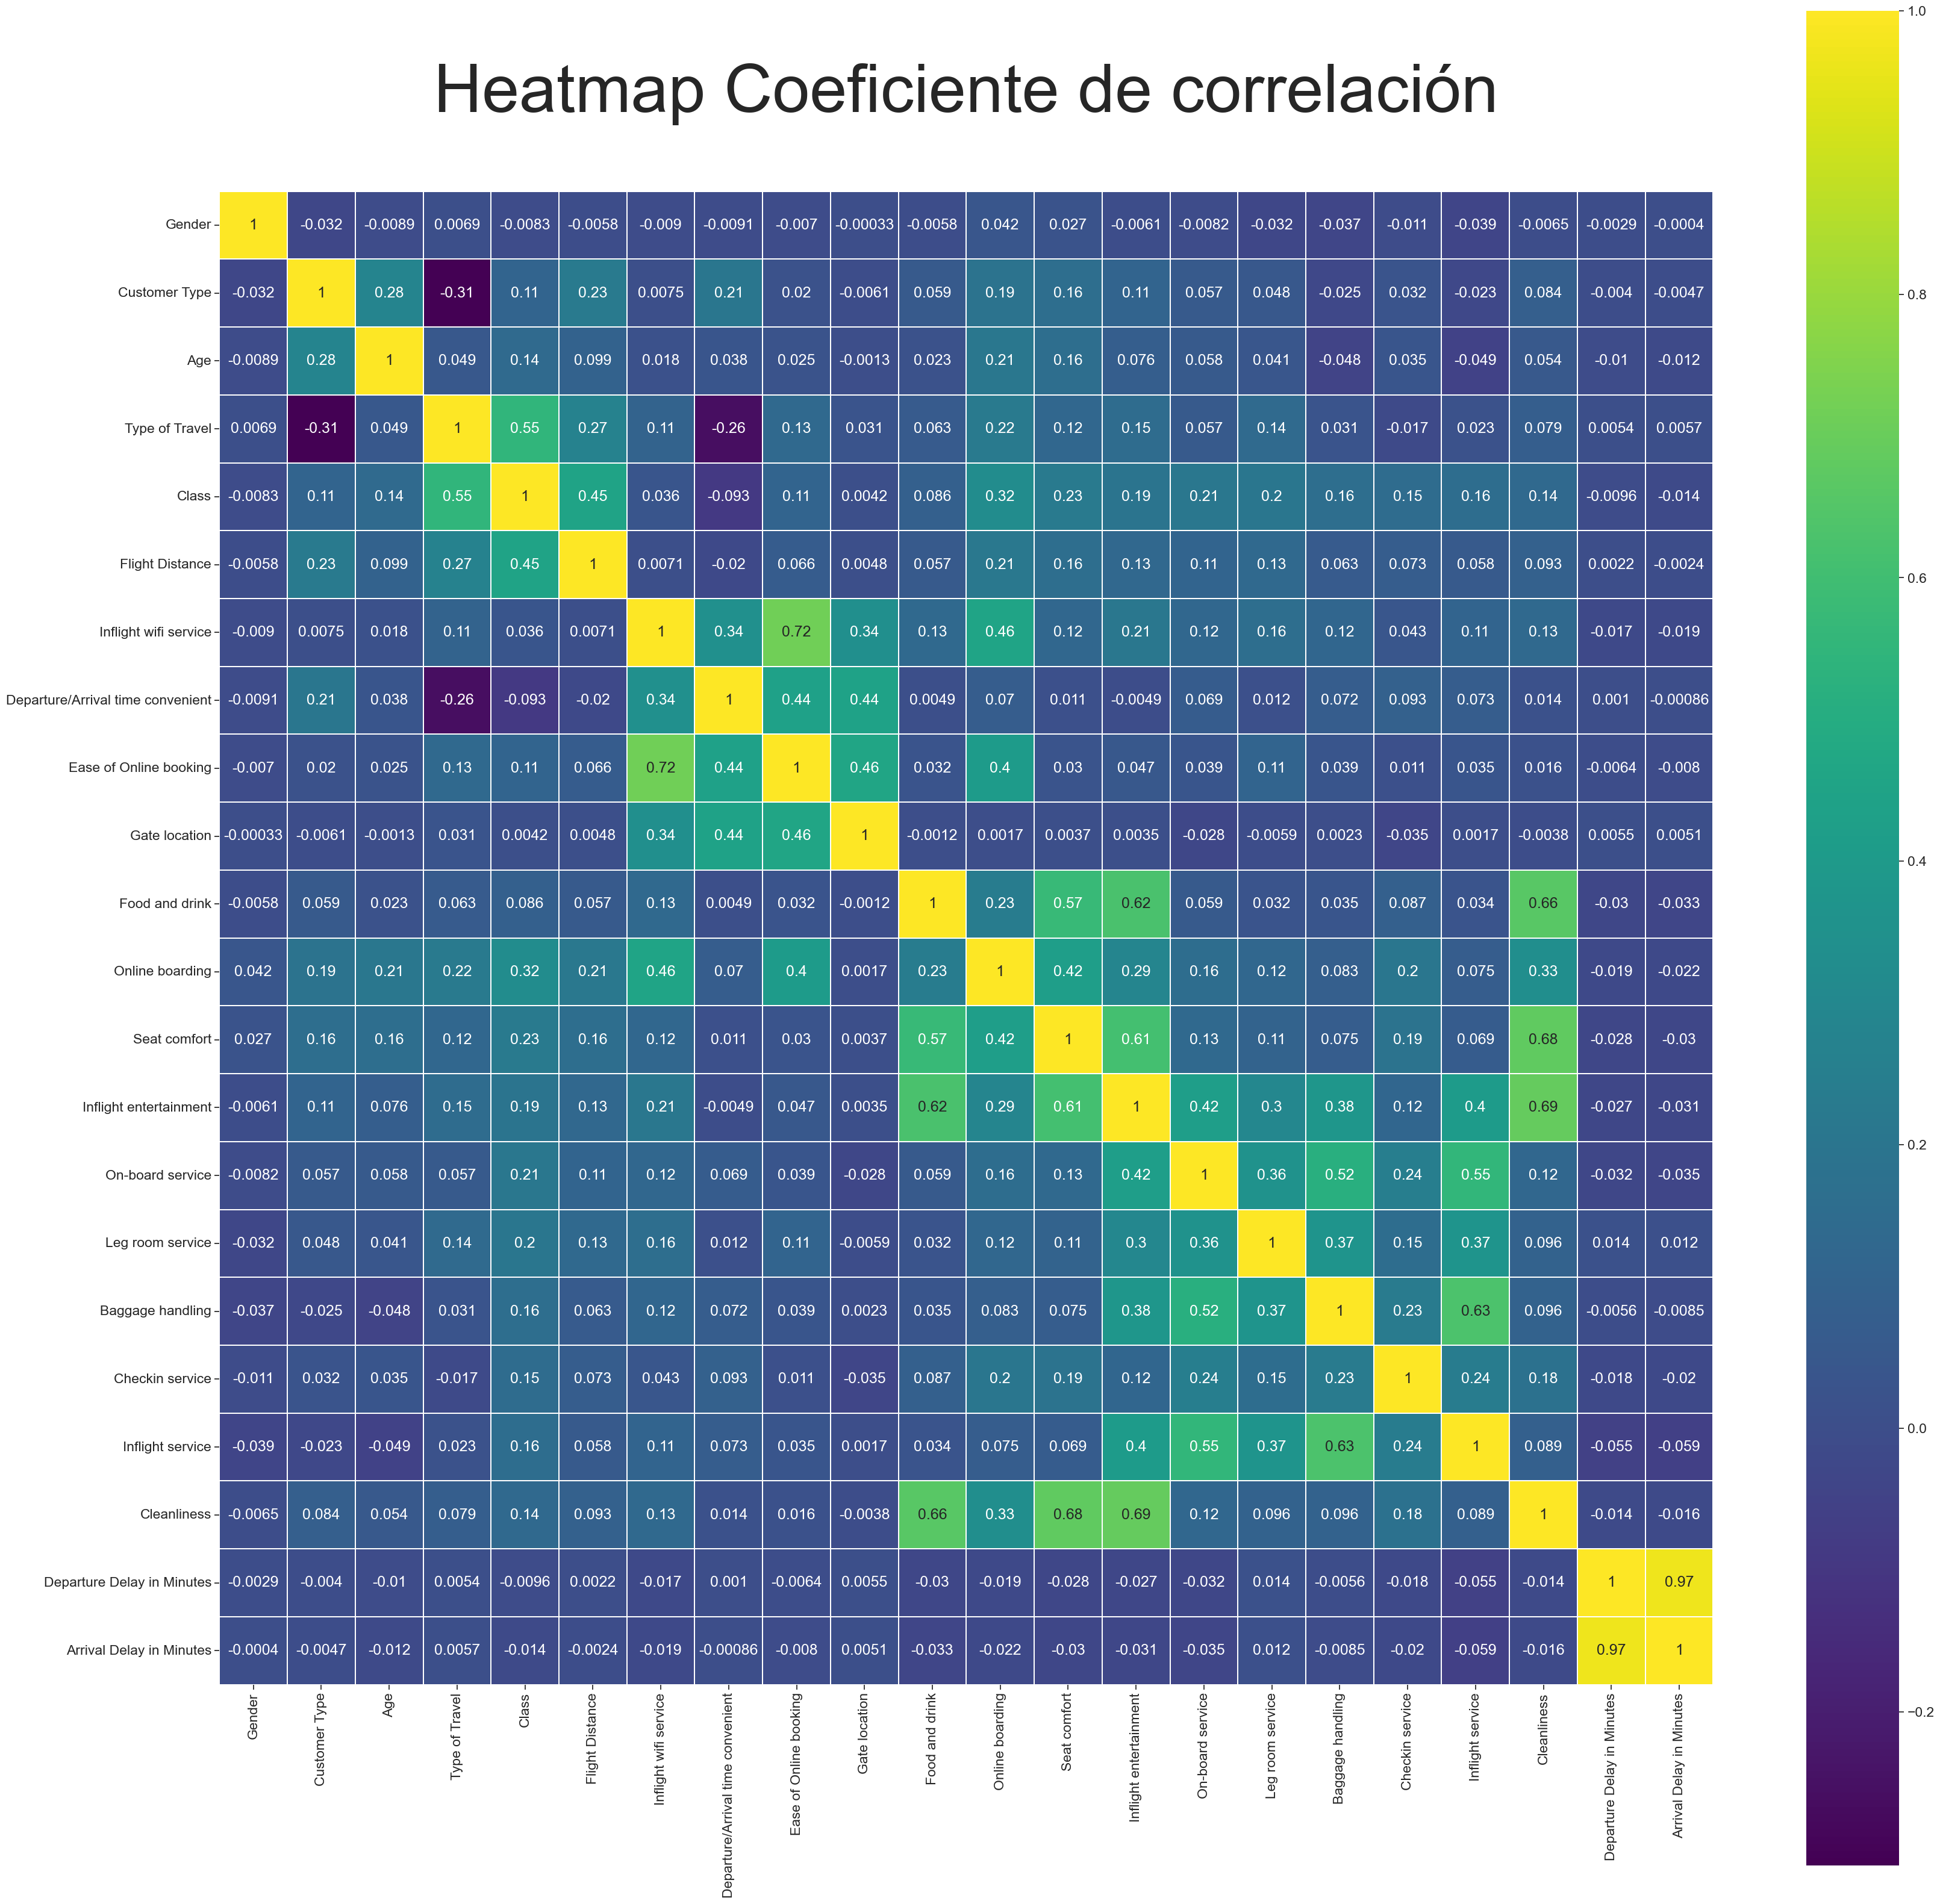

In [ ]:
dfaux=df.drop(['satisfaction'],axis=1)
mapacoef = plt.cm.viridis

plt.figure(figsize=(40,40))
plt.title('Heatmap Coeficiente de correlación', y=1.05, size=80)
sns.heatmap(dfaux.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=mapacoef, linecolor='white', annot=True)

plt.show()

Teniendo en cuenta la alta correlacion existente entre el retraso de la salida y el retraso de la llegada se graficará con el fin de ver si es posible eliminar una de ambas en el feature selection

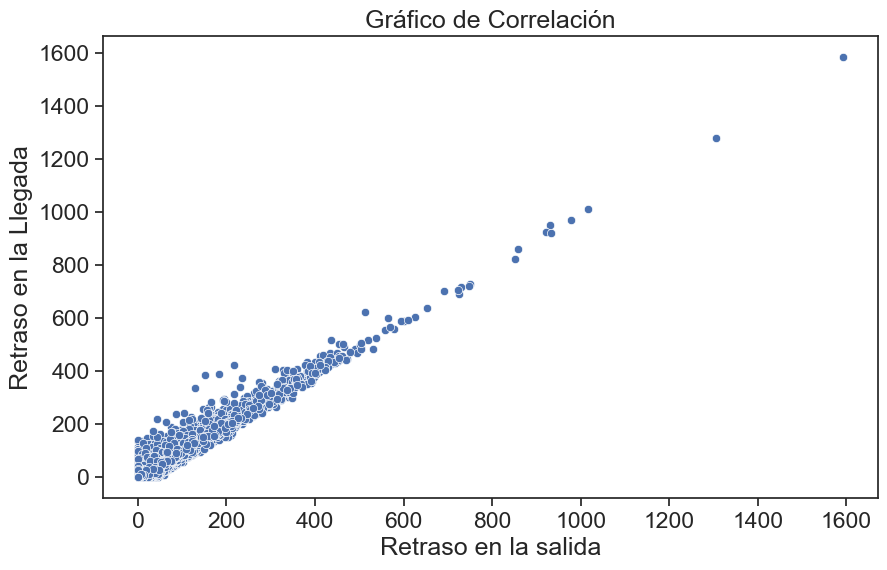

In [ ]:
plt.subplots(figsize = (10, 6))

scaterretraso = sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = df)
scaterretraso.set(xlabel = "Retraso en la salida", ylabel = "Retraso en la Llegada", title = "Gráfico de Correlación")

plt.show()

## Conclusion 
El análisis revela una fuerte correlación entre el retraso en la salida y el retraso en la llegada. Por lo tanto, podemos concluir que, debido a esta alta correlación, prescindir de una de estas variables sería adecuado durante la selección de características relevantes. En este caso, optaré por descartar el retraso en la salida.

Otras variables que muestran una correlación significativa, alrededor de 0.7, incluyen Inflight wifi service y Ease of Online booking, Cleanliness y Inflight entertainm, Cleanliness y Seat comfort, y Food and drink y Cleanliness. Realizaré un análisis similar para determinar si alguna de estas variables puede ser eliminada durante la etapa de selección de características relevantes.

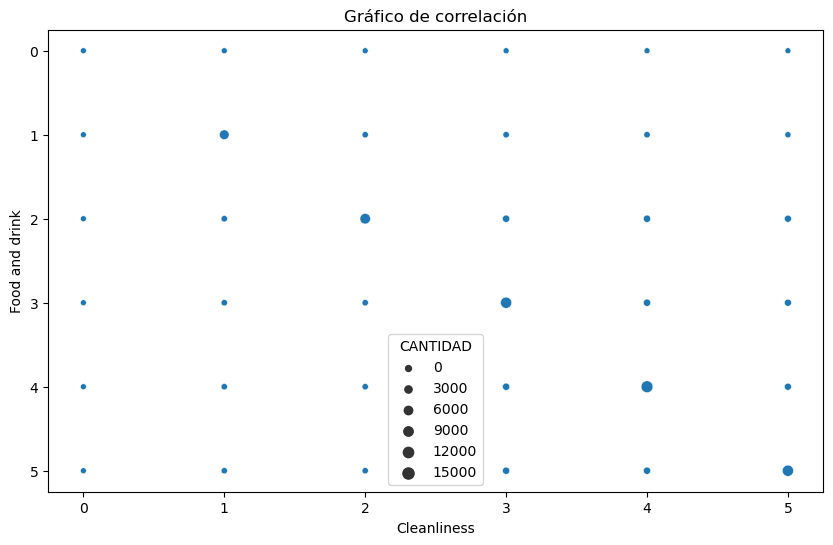

In [216]:
plt.subplots(figsize=(10, 6))

aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Food and drink'])['index'].count().to_frame('CANTIDAD').reset_index()
scatter = sns.scatterplot(x='Cleanliness', y='Food and drink', size='CANTIDAD', data=aux_burbuja)
scatter.set_title("Gráfico de correlación")
plt.show()



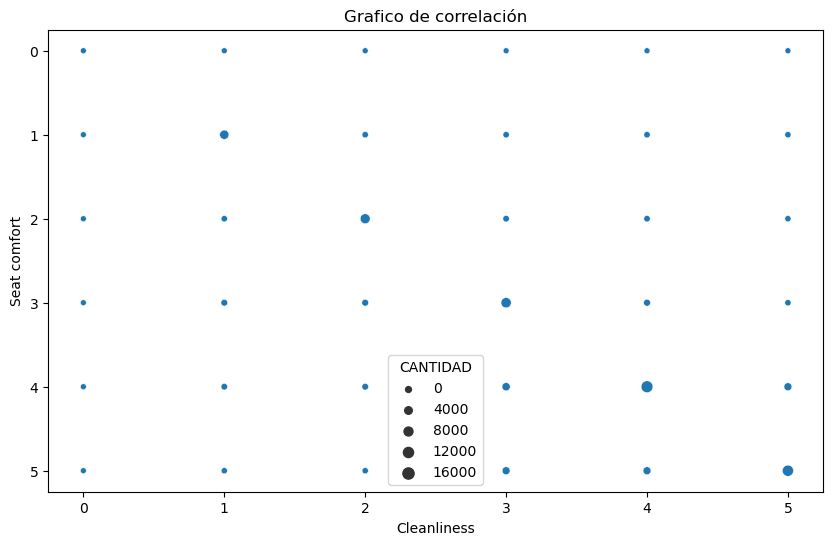

In [218]:
plt.subplots(figsize=(10, 6))

aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Seat comfort'])['index'].count().to_frame('CANTIDAD').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Seat comfort', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = "Cleanliness", ylabel = "Seat comfort", title = "Grafico de correlación")
plt.show()

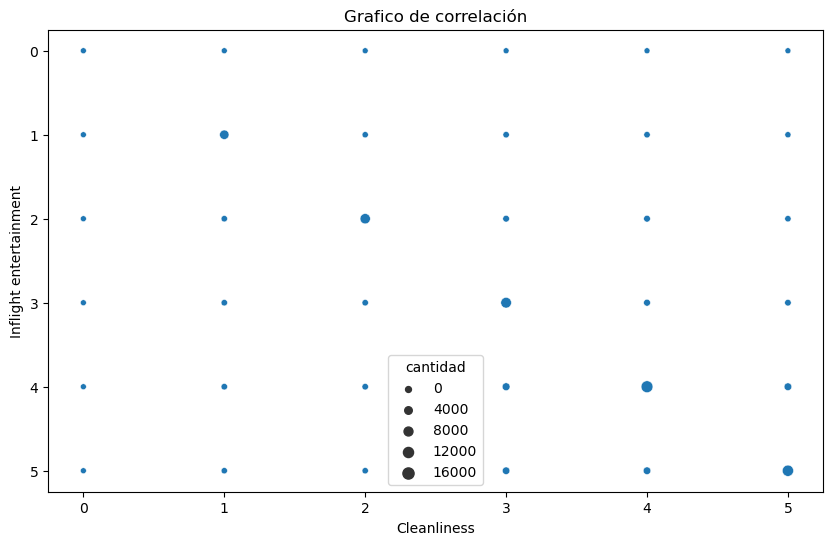

In [219]:
plt.subplots(figsize=(10, 6))
aux_burbuja = df.reset_index().groupby(['Cleanliness', 'Inflight entertainment'])['index'].count().to_frame('cantidad').reset_index()
scater = sns.scatterplot(x = 'Cleanliness', y = 'Inflight entertainment', size = 'cantidad', data = aux_burbuja)
scater.set(xlabel = "Cleanliness", ylabel = "Inflight entertainment", title = "Grafico de correlación")
plt.show()

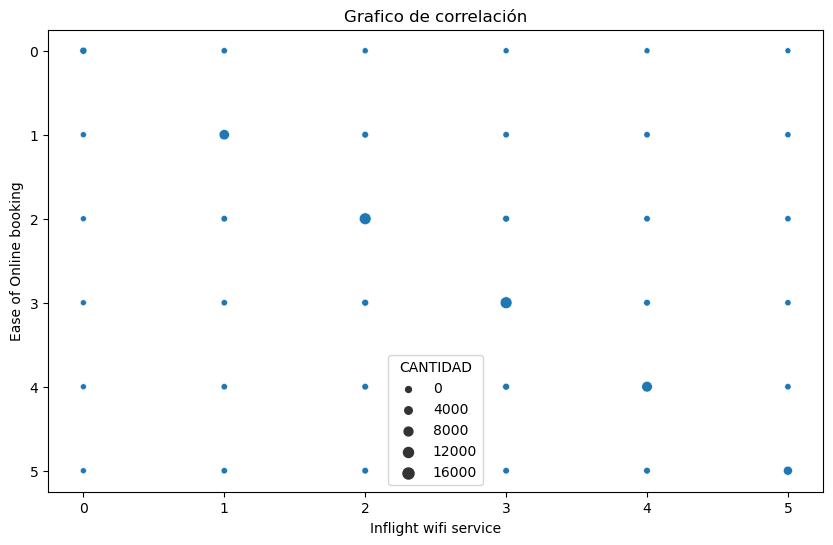

In [221]:
plt.subplots(figsize = (10, 6))
aux_burbuja = df.reset_index().groupby(['Inflight wifi service','Ease of Online booking'])['index'].count().to_frame('CANTIDAD').reset_index()
scater=sns.scatterplot(x = 'Inflight wifi service', y = 'Ease of Online booking', size = 'CANTIDAD', data = aux_burbuja)
scater.set(xlabel = "Inflight wifi service", ylabel = "Ease of Online booking", title = "Grafico de correlación")
plt.show()

## Conclusion
En estos cuatro casos, la correlación es evidente ya que al aumentar una variable, la otra también tiende a aumentar, como se puede observar en el tamaño de las burbujas en el gráfico. Por lo tanto, en la etapa de selección de características, eliminaré la variable "Cleanliness" en los tres primeros casos y "Inflight wifi service" en el último.